## Notebook Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Constants

In [64]:
DISASTER_TWEET_PROB_FILE = 'KAGGLE/prob-disaster.txt'
NON_DISASTER_TWEET_PROB_FILE = 'KAGGLE/prob-nondisaster.txt'
TOKEN_ALL_PROB_FILE = 'KAGGLE/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'KAGGLE/test-features.txt'
TEST_TARGET_FILE = 'KAGGLE/test-target.txt'

VOCAB_SIZE = 250

## Load Data

In [65]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token probabilities
prob_tokens_disaster = np.loadtxt(DISASTER_TWEET_PROB_FILE, delimiter=' ')
prob_tokens_nondisaster = np.loadtxt(NON_DISASTER_TWEET_PROB_FILE, delimiter=' ')
prob__all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [66]:
wwc = np.array([1, 2, 3])
ggp = np.array([0, 5, 4])
np.matmul(wwc, ggp)

22

In [67]:
print('Shape of the dot product between X_test and prob_tokens_disaster is ', X_test.dot(prob_tokens_disaster).shape)

Shape of the dot product between X_test and prob_tokens_disaster is  (2205,)


## Set the prior

$$P(Disaster \, | \, X) = \frac{P(X \, | \, Disaster \,) \, P(Disaster)}{P(X)}$$

In [68]:
PROB_DISASTER = 0.4404

**Next,** We calculate the log prob of tokens given that the tweet was disastrous. This was stored in prob_tokens_disaster

In [69]:
np.log(prob_tokens_disaster)

array([-1.67298612, -4.84652527, -3.93565461, -4.94589775, -4.27539304,
       -5.62422984, -4.71977357, -5.30044277, -4.79388154, -4.48715127,
       -5.36640073, -5.12523868, -4.50619947, -5.14325718, -4.71977357,
       -5.62422984, -4.74387112, -5.14325718, -4.67325355, -4.75614121,
       -4.96093563, -5.74939299, -4.99170728, -5.25877007, -5.46171091,
       -5.81838586, -4.94589775, -4.90209513, -5.00745564, -5.59524231,
       -6.58564101, -4.79388154, -4.94589775, -5.41292075, -4.73174976,
       -6.15485809, -6.01509615, -5.05624581, -5.89249383, -5.89249383,
       -6.15485809, -6.10606793, -5.59524231, -5.25877007, -6.51153304,
       -4.75614121, -5.14325718, -5.30044277, -5.56707143, -7.54115246,
       -4.96093563, -6.75269509, -5.21876473, -4.84652527, -5.59524231,
       -5.41292075, -5.71660316, -5.93171454, -5.68485446, -6.31737702,
       -6.15485809, -6.20615139, -5.51300421, -5.23856736, -6.20615139,
       -5.21876473, -6.20615139, -5.12523868, -6.95336579, -5.46

### Joint probability in log format

In [70]:
joint_log_disaster = X_test.dot(np.log(prob_tokens_disaster) - np.log(prob__all_tokens)) + np.log(PROB_DISASTER)

In [71]:
joint_log_disaster[:5]

array([-0.38362026, -0.39283024,  0.06223683, -0.94460689, -2.04420489])

**Next,** we calculate the log probabilty that the tweets are non-disaster given their tokens and store the result in a variable called joint_log_nondisaster

$$P(NonDisaster  \, | \, X) = \frac{P(X \, | \, NonDisaster \,) \, (1- P(Disaster))}{P(X)}$$

In [72]:
joint_log_nondisaster = X_test.dot(np.log(prob_tokens_nondisaster) - np.log(prob__all_tokens)) + np.log(1-PROB_DISASTER)

In [73]:
joint_log_nondisaster[:5]

array([-1.96913789, -1.36450814, -1.81440878, -0.47424292, -0.05937136])

In [74]:
joint_log_nondisaster.size

2205

## Making Predictions

### Checking for the higher joint probabilty

$$P(Disaster \, | \, X) \, > P(NonDisaster \, | \, X)$$
<center>**OR**</center>
$$P(Disaster \, | \, X) \, < P(NonDisaster \, | \, X)$$

In [75]:
prediction = joint_log_disaster > joint_log_nondisaster

In [76]:
prediction.sum()

844

In [77]:
prediction[-5:]*1

array([1, 1, 1, 1, 1])

In [78]:
y_test[-5:]

array([1., 1., 1., 1., 1.])

## Lets simplify

$$P(Disaster \, | \, X)P(Disaster) \neq \frac{P(X \, | \, Disaster \,) \, P(Disaster)}{P(X)}$$

In [79]:
joint_log_disaster = X_test.dot(np.log(prob_tokens_disaster)) + np.log(PROB_DISASTER)
joint_log_nondisaster = X_test.dot(np.log(prob_tokens_nondisaster)) + np.log(1-PROB_DISASTER)

## Metrics and Evaluation
### Accuracy

In [80]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1639
Docs classified incorrectly 566


In [81]:
# Accuracy
correct_docs/len(X_test)

0.7433106575963719

In [82]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 25.67%
Accuracy of the model is 74.33%


### Visualizing the Results

In [83]:
# Chart Styling info
yaxis_label = 'P(X | Disaster)'
xaxis_label = 'P(X | NonDisaster)'

linedata = np.linspace(start=-60, stop=1, num=3)

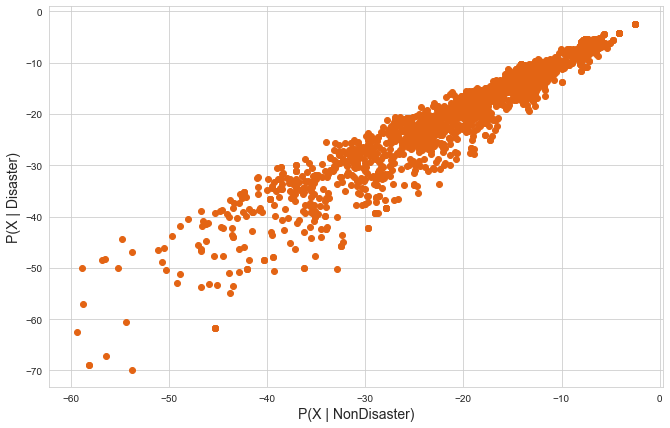

In [84]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
# plt.xlim([-14000, 1])
# plt.ylim([-14000, 1])


plt.scatter(joint_log_disaster, joint_log_nondisaster, color='#e36414')
plt.show()

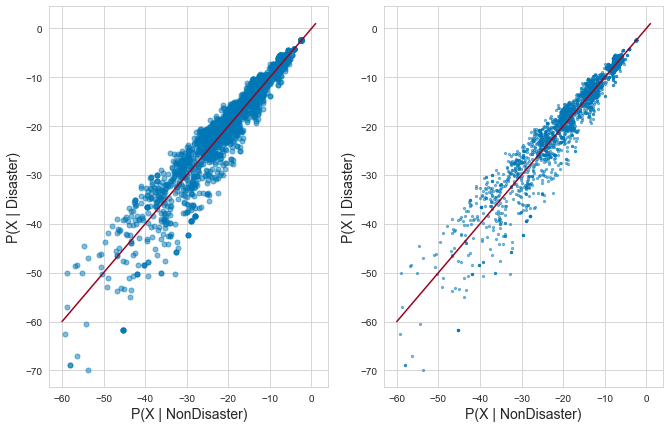

In [85]:
plt.figure(figsize=(11,7))

# Chart No.1
plt.subplot(1,2,1)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
# Set scale
# plt.xlim([-14000, 1])
# plt.ylim([-14000, 1])
plt.scatter(joint_log_disaster, joint_log_nondisaster, color='#0077b6', alpha=0.5, s=25)
plt.plot(linedata, linedata, color='#9a031e')

# Chart No.2
plt.subplot(1,2,2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)
# Set scale
# plt.xlim([-2000, 1])
# plt.ylim([-2000, 1])
plt.scatter(joint_log_disaster, joint_log_nondisaster, color='#0077b6', alpha=0.5, s=5)
plt.plot(linedata, linedata, color='#9a031e')

plt.show()

In [86]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_disaster, xaxis_label: joint_log_nondisaster, 
                           labels: y_test})

C:\Users\User\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


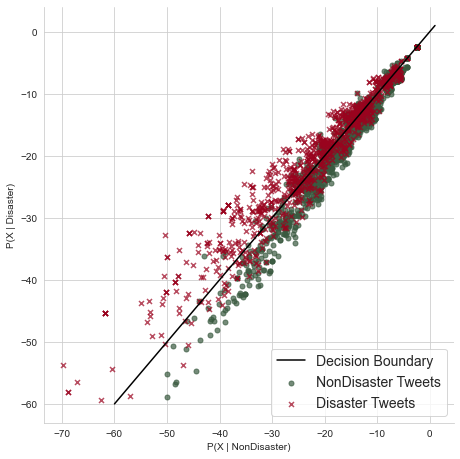

In [87]:
my_colors = ['#3a5a40', '#9a031e']
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, 
           hue=labels, markers=['o','x'], palette=my_colors, legend=False,
           scatter_kws={'alpha':0.7, 's':25})
# plt.xlim([-500, 1])
# plt.ylim([-500, 1])
plt.plot(linedata, linedata, color='black')
plt.legend(('Decision Boundary', 'NonDisaster Tweets', 'Disaster Tweets'), loc='lower right', fontsize=14)
#sns.plt.show

### False Positives and False Negatives

In [88]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1361,  844], dtype=int64))

In [89]:
true_pos = (y_test==1)&(prediction==1)
true_pos.sum()

615

In [90]:
true_pos

array([ True,  True,  True, ...,  True,  True,  True])

Here, we create a numpy array that measures the False Positives for each datapoint. We call this variable false_pos, and then we work out how many false positives there were. After that, we do same for the false negatives and store those in a variable called false_neg

In [91]:
false_pos = (y_test==0)&(prediction==1)
false_neg = (y_test==1)&(prediction==0)
print(f'False positives: {false_pos.sum()}')
print(f'False negatives: {false_neg.sum()}')

False positives: 229
False negatives: 337


## Recall Score
Next, we calculate the recall score and store it in a variable called recall_score. We then print the value of the recall score as a percentage rounded to two decimal places.

In [92]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('The recall score is {:.2%}'.format(recall_score))

The recall score is 64.60%


In [93]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('The recall score is ', round(recall_score, 2))

The recall score is  0.65


## Precision Score
Next, we calculate the precision of our naive bayes model. We store the result in a variable called precision_score and then print out the precision as a decimal number rounded to three decimal places

In [94]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('The recall score is ', round(precision_score, 3))

The recall score is  0.729


In [95]:
# Another technique
print('The recall score is {:.3f}'.format(precision_score))

The recall score is 0.729


## F-Score or F1 Score

In [96]:
f1_score = 2*(precision_score*recall_score)/(precision_score+recall_score)
print('F Score is {:.2f}'.format(f1_score))

F Score is 0.68
